### Data from
https://open.toronto.ca/dataset/neighbourhood-profiles/

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data

In [111]:
nb_2016 = pd.read_csv('neighbourhood-profiles-2016-csv.csv')
nb_2016.head(3)

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"


# Viewing/Inspecting Data

In [112]:
print(nb_2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Columns: 146 entries, _id to Yorkdale-Glen Park
dtypes: int64(1), object(145)
memory usage: 2.7+ MB
None


In [113]:
print(nb_2016.columns)

Index(['_id', 'Category', 'Topic', 'Data Source', 'Characteristic',
       'City of Toronto', 'Agincourt North', 'Agincourt South-Malvern West',
       'Alderwood', 'Annex',
       ...
       'Willowdale West', 'Willowridge-Martingrove-Richview', 'Woburn',
       'Woodbine Corridor', 'Woodbine-Lumsden', 'Wychwood', 'Yonge-Eglinton',
       'Yonge-St.Clair', 'York University Heights', 'Yorkdale-Glen Park'],
      dtype='object', length=146)


In [114]:
print(nb_2016['Category'].unique())

['Neighbourhood Information' 'Population'
 'Families, households and marital status' 'Language' 'Income'
 'Immigration and citizenship' 'Visible minority' 'Ethnic origin'
 'Aboriginal peoples' 'Education' 'Housing' 'Language of work' 'Labour'
 'Journey to work' 'Mobility']


# Creating Subset

In [115]:
# To get population in 2016, 2011
pop_2016_2011 = nb_2016[nb_2016['Characteristic'].isin(['Population, 2016', 'Population, 2011', 'Population Change 2011-2016'])]
pop_2016_2011 = pop_2016_2011.transpose()[5:].reset_index()
map = {'index':'areaName', 2:'pop2016', 3: 'pop2011', 4:'delta11_16'}
pop_2016_2011.rename(columns=map, inplace=True)
pop_2016_2011['pop2016'] = pop_2016_2011['pop2016'].str.replace(',', '').astype(int)
pop_2016_2011['pop2011'] = pop_2016_2011['pop2011'].str.replace(',', '').astype(int)
pop_2016_2011['delta11_16'] = pop_2016_2011['delta11_16'].str.replace('%', '').astype(float) / 100
pop_2016_2011.head(3)

,areaName,pop2016,pop2011,delta11_16
0,City of Toronto,2731571,2615060,0.045
1,Agincourt North,29113,30279,-0.039
2,Agincourt South-Malvern West,23757,21988,0.080


In [117]:
# Top 5 population decreasing neibourhoods
pop1611D = pop_2016_2011.sort_values('delta11_16').head(5)
pop1611D

,areaName,pop2016,pop2011,delta11_16
128,Weston-Pelham Park,11098,12010,-0.076
52,Highland Creek,12494,13097,-0.046
53,Hillcrest Village,16934,17656,-0.041
1,Agincourt North,29113,30279,-0.039
20,Cabbagetown-South St. James Town,11669,12053,-0.032


In [118]:
# Top 5 population increasing neibourhoods
pop1611I = pop_2016_2011.sort_values('delta11_16', ascending=False).head(5)
pop1611I

,areaName,pop2016,pop2011,delta11_16
123,Waterfront Communities-The Island,65913,43361,0.520
88,Niagara,31180,21274,0.466
49,Henry Farm,15723,11333,0.387
7,Bay Street Corridor,25797,19348,0.333
72,Little Portugal,15559,12050,0.291


# Graphs

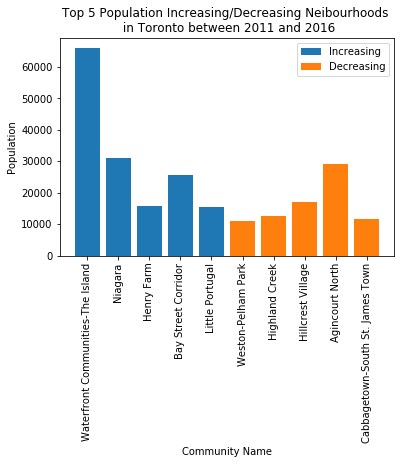

In [119]:
plt.bar(pop1611I['areaName'], pop1611I['pop2016'], label='Increasing')

plt.xticks(rotation='vertical')
plt.xlabel('Community Name')
plt.ylabel('Population')
plt.title('Top 5 Population Increasing Communities \n Toronto, Ontario, Canada 2016')

plt.bar(pop1611D['areaName'], pop1611D['pop2016'], label='Decreasing')

plt.title('Top 5 Population Increasing/Decreasing Neibourhoods \n in Toronto between 2011 and 2016')

plt.legend(loc='upper right')

plt.show()

In [120]:
ind = str(pop1611I.index.values)
ind

'[123  88  49   7  72]'

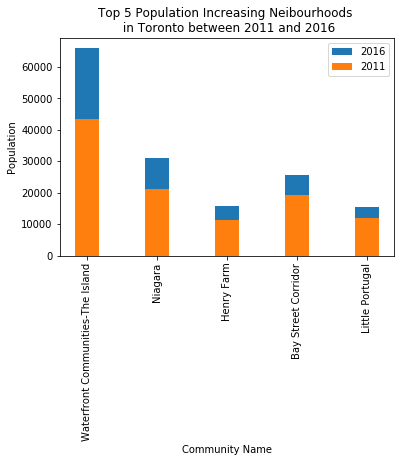

In [128]:
# Top 5 population increasing neibourhoods
width = 0.35

plt.bar(pop1611I['areaName'], pop1611I['pop2016'], width, label='2016')
plt.bar(pop1611I['areaName'], pop1611I['pop2011'], width, label='2011')

plt.xticks(rotation='vertical')
plt.xlabel('Community Name')
plt.ylabel('Population')
plt.title('Top 5 Population Increasing Neibourhoods \n in Toronto between 2011 and 2016')

plt.legend(loc='upper right')

plt.show()

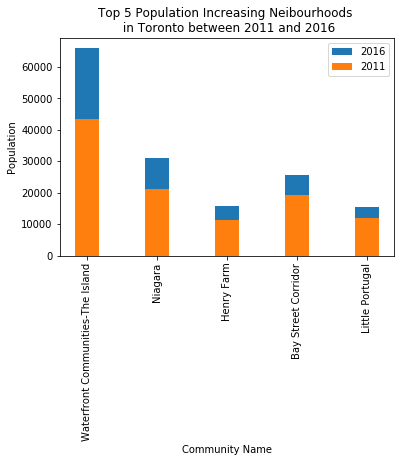

In [122]:
# Top 5 population increasing neibourhoods
width = 0.35

plt.bar(pop1611I['areaName'], pop1611I['pop2016'], width, label='2016')
plt.bar(pop1611I['areaName'], pop1611I['pop2011'], width, label='2011')

plt.xticks(rotation='vertical')
plt.xlabel('Community Name')
plt.ylabel('Population')
plt.title('Top 5 Population Increasing Neibourhoods \n in Toronto between 2011 and 2016')

plt.legend(loc='upper right')

plt.show()

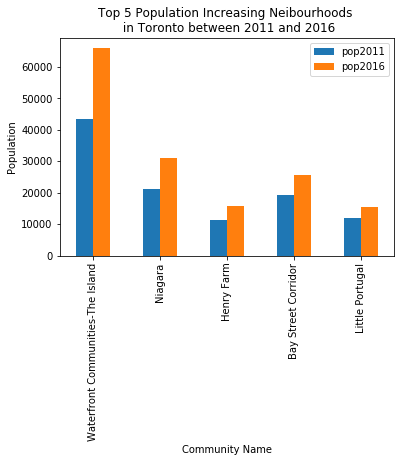

In [123]:
pop1611I[['pop2011','pop2016']].plot.bar()
plt.xticks(np.arange(len(pop1611I)), pop1611I['areaName'], rotation='vertical')
plt.xlabel('Community Name')
plt.ylabel('Population')
plt.title('Top 5 Population Increasing Neibourhoods \n in Toronto between 2011 and 2016')

plt.legend(loc='upper right')

plt.show()

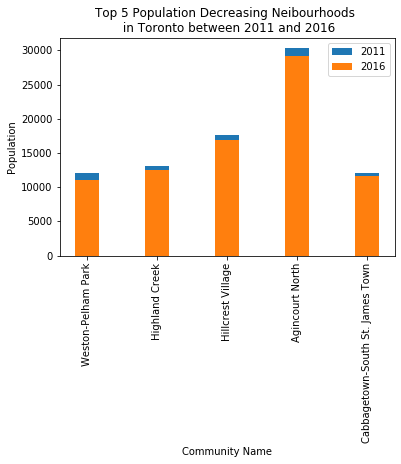

In [124]:
# Top 5 population decreasing neibourhoods
width = 0.35

plt.bar(pop1611D['areaName'], pop1611D['pop2011'], width, label='2011')
plt.bar(pop1611D['areaName'], pop1611D['pop2016'], width, label='2016')

plt.xticks(rotation='vertical')
plt.xlabel('Community Name')
plt.ylabel('Population')
plt.title('Top 5 Population Decreasing Neibourhoods \n in Toronto between 2011 and 2016')

plt.legend(loc='upper right')

plt.show()

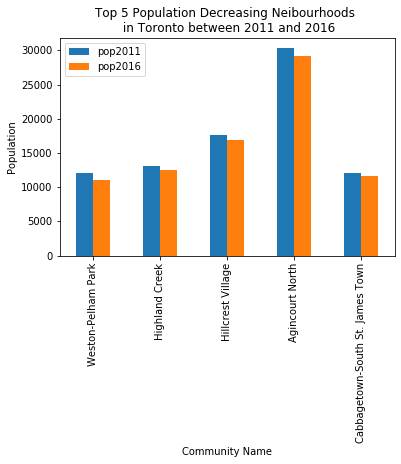

In [125]:
pop1611D[['pop2011','pop2016']].plot.bar()
plt.xticks(np.arange(len(pop1611D)), pop1611D['areaName'], rotation='vertical')
plt.xlabel('Community Name')
plt.ylabel('Population')
plt.title('Top 5 Population Decreasing Neibourhoods \n in Toronto between 2011 and 2016')

plt.legend(loc='upper left')
plt.savefig('my_plot.png')
plt.show()
